<a href="https://colab.research.google.com/github/eunjaelim/deeplearning/blob/main/210_IRIS_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%9C%ED%94%8C%EB%A6%BF_%EB%AC%B8%EC%A0%9C_v2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝, 딥러닝 IRIS템플릿(HARD)

## > 머신러닝, 딥러닝 IRIS템플릿 목적
- 간단하게 쉽게 머신러닝, 딥러닝 모델링 만들기
- 잘 몰라도 아래 순서에 맞게 , 이런식으로 실행하면 되겠구나 느끼기
- 여러분이 처음 한다고 생각하고 템플릿 작성함

## > 모델링 프로세스
1. 데이터 가져오기
2. 데이터 분석
3. X , y 나누기
4. 머신러닝 모델링
5. 딥러닝 모델링
6. 딥러닝 성능 평가

---

# 1. 데이터 가져오기
- 먼저, 데이터가 있어야 모델링을 만들수 있다.
- 데이터 가져오는 방법에는 여러가지 있다.
 - 본인 데이터를 직접 올리는 방법
 - 기존에 제공하는 데이터 가져다 쓰는 방법

In [1]:
# 필요한 라이브러리 가져오기
# 그냥 무조건 가져온다고 생각하자 : pandas, numpy, seaborn, matplotlib.pyplot
# seaborn 설치가 되어 있지 않으면 라이브러리는 설치 필요 : !pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Seaborn에서 제공하는 데이터셋 확인하기
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

#### IRIS 데이터셋 가져오기

In [3]:
# 많이 사용하는 데이터는 'iris' , 'tips' , 'titanic'
# 그중에서 iris 데이터셋 가져오기
# seaborn load_dataset('iris') 함수 활용 : 결과 iris 저장

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
type(iris)

pandas.core.frame.DataFrame

In [5]:
# 가져온 iris 데이터 앞 5개 확인 하기
# 자동으로 판다스 데이터프레임 형식으로 읽어짐


iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


![IRIS](https://blog.kakaocdn.net/dn/CJCHb/btqS1WqufxB/IMgacd6IXsCl2LLgm1lykK/img.png)

# 2. 데이터 분석
- 눈으로 데이터 수치를 보고 어떤 흐름인지 파악할수 있지만,
- 시각화를 통한다면 쉽게 흐름을 파악할수 있으니, 할수 있으면 사용해라.
- 여러분에게는 어려울수 있으니, 아, 이렇게 데이터를 가지고 시각화를 할수 있구나 느낀면 된다.

In [7]:
# 간단하게 시각화해 보기
# 여러분은 잘 모르지만, 나중에 이렇게 시각화를 할수 있구나 알기

# value_counts 함수 이용해서 species 컬럼에 대한 분포 확인

iris['species'].value_counts()



setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
type(iris['species'].value_counts())

pandas.core.series.Series

<Axes: >

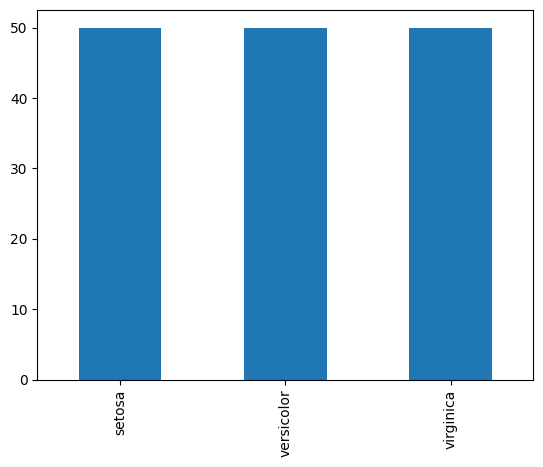

In [9]:
# value_counts 함수 이용해서 species 컬럼에 대한 분포 확인값을 bar 차트 그리기

iris['species'].value_counts().plot(kind='bar')


<Axes: xlabel='sepal_length', ylabel='petal_length'>

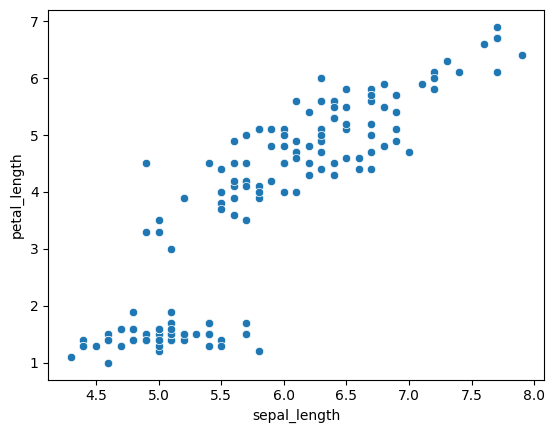

In [10]:
# 판다스 plot 함수 활용해 산점도(scatter) 그래프 시각화해 보기
# 입력 : kind='scatter', x='sepal_length', y='petal_length'


sns.scatterplot(data=iris, x='sepal_length', y='petal_length')


<Axes: xlabel='sepal_length', ylabel='petal_length'>

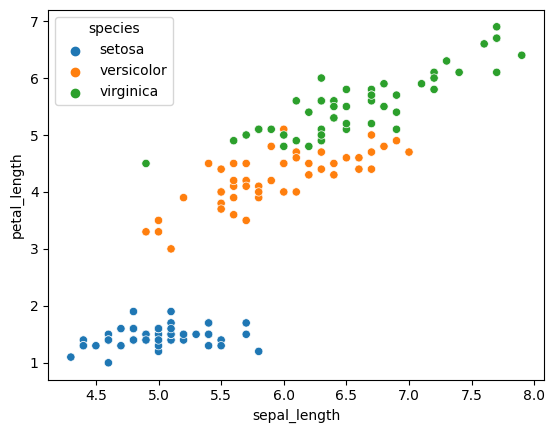

In [11]:
# 이번에는 seaborn scatterplot 함수 활용해서 산점도 그리기
# 입력 : data=iris, x='sepal_length', y='petal_length', hue='species'

# 위와 똑같은 그래프지만, 붓꽃 종류로 분류해서 그래프
# 붓꽃 종류 3가지가 구분되어 보입니다.

sns.scatterplot(data=iris, x='sepal_length', y='petal_length',hue='species')


---

# 3. X, y 나누기
- 지도학습 경우 데이터와 정답이 있어야 합니다.
- 데이터에 해당하는 X와 정답에 해당하는 y가 있어야 합니다.
- 아래와 같이 판다스를 이용하면 X, y를 쉽게 나눌수 있어요

In [12]:
# IRIS 데이터 뒤 5개 보기
iris.tail()



,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [13]:
# X 분리 : 판다스 drop 함수 활용
# 입력 : 'species', axis=1

X =  iris.drop('species',axis=1)


In [14]:
# 분리된 X 확인 : 데이터 타입이 데이터프레임 확인

X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
X.index

RangeIndex(start=0, stop=150, step=1)

In [16]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [17]:
X.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
# y 분리 : 'species' 컬럼값만 분리

y = iris['species']

In [19]:
# 분리된 y 확인 : 데이터 타입이 Series 확인
# y 값이 문자열로 되어 있음 확인


y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [20]:
# Series, DataFrame 형태를 numpy array 변경하기
# 뒤쪽에서 타입이 맞지 않아서 에러 날수 있기 때문에
# X.values , y.values --> X , y 입력
X = X.values
y = y.values


In [21]:
print(X[:2])
print(y[:2])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
['setosa' 'setosa']


In [22]:
# y값이 숫자가 아니기에 컴퓨터가 잘 이해하지 못해 숫자로 변환
# setosa --> 0, versicolor --> 1, virginica --> 2 : LabelEncoding

from sklearn.preprocessing import LabelEncoder


In [23]:
# 1. LabelEncoder 함수 정의 : le
# 2. y값에 대해 fit_transform 함수 이용해서 라벨인코딩 수행하고 다시 y에 저장
# 3. le.classes_ 출력해서 어떤 라벨들이 인코딩 되었는지 확인

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [24]:
# y값들이 라벨인코딩되어 숫자로 표현됨 확인

y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# 4. Train , Test 데이터셋 나누기
- 데이터를 가지고 모델을 학습 시키고 나서 모델 평가를 해야 하는데
- 모델이 학습한 데이터를 가지고 평가를 하지 않고
- 모델이 모르는 데이터로 평가를 해야 공정하고 평가 결과가 잘 나온다면 배포(일반화) 가능하다.

In [25]:
# Train / Test 데이터셋 나누어주는 함수 : train_test_split

from sklearn.model_selection import train_test_split

In [26]:
# train_test_split 함수 활용
# 입력 : X, y
# Train : Test => 8 : 2  비율로 나누기 : test_size=0.2
# Train 데이터와 Test 데이터에 y가 쏠리지 않도록 하기 : stratify=y
# 매번 같은 결과 나오도록 값 고정 : random_state=42
# 결과 저장 : X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42)


In [27]:
# Train 과 Test 데이터셋 사이즈 확인
# X_train.shape, X_test.shape, y_train.shape, y_test.shape 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

---

# 5. 머신러닝 모델링
- DecisionTree 결정트리
- RandomForest 앙상블

#### DecisionTree

![결정트리](http://gavinln.github.io/blog-site/img/decision_trees/tree-depth-2.png)

In [29]:
# DecisionTree 머신러닝 모델링
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [30]:
# 1. DecisionTreeClassifier 모델 정의 -> dt 저장
# 2. dt 모델 학습 : X_train, y_train
# 3. dt 모델 성능확인 : X_test, y_test

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)



0.9666666666666667

#### RandomForest

![RandomForest](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdDE2Rk%2FbtqvUzlulvU%2F6UbCGO8rHAhDJDCE3dyRr0%2Fimg.png)

In [31]:
# RandomForest 머신러닝 모델링
from sklearn.ensemble import RandomForestClassifier

In [34]:
# 1. RandomForestClassifier 모델 정의 -> rf 저장
# 2. rf 모델 학습 : X_train, y_train
# 3. rf 모델 성능확인 : X_test, y_test

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)





0.9333333333333333

In [35]:
rf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
# X_test 첫라인 샘플 데이터 와 정답 출력
# setosa --> 0, versicolor --> 1, virginica --> 2

print(X_test[0:1])
print(y_test[0:1])

[[4.4 3.  1.3 0.2]]
[0]


In [37]:
# X_test 첫라인 샘플 데이터을 모델 입력해서 예측하기
# rf 모델의 predict 함수 활용
# 입력 : X_test[0:1], 결과 : pred 저장
# pred 결과 출력
pred = rf.predict(X_test[0:1])
pred

array([0])

---

# 6. 딥러닝 모델링

In [38]:
# 딥러닝 필요한 라이브러리 가져오기

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

![DNN](https://t1.daumcdn.net/cfile/tistory/9976DE33598420B531)

In [40]:
# Sequential 모델 만들기 --> model 변수 저장
# input layer : (4, )
# hidden layer : 6 unit , activation='relu'
# output layer : 3 unit , activation='softmax'

model = Sequential()
model.add(Dense(6,activation = 'relu',input_shape=(4,)))
model.add(Dense(3,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 30        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# 모델 컴파일 : compile
# loss='sparse_categorical_crossentropy'
# optimizer='adam'
# metrics=['accuracy']

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# 모델 학습 : fit
# X_train, y_train, epochs=10, batch_size=8
# 학습결과 저장 : history
history = model.fit(X_train,y_train,epochs=10,batch_size=8)



Epoch 1/10
15/15 [==============================] - 1s 2ms/step - loss: 2.9592 - accuracy: 0.3333
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 2.4548 - accuracy: 0.4000
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 2.0383 - accuracy: 0.6167
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 1.6884 - accuracy: 0.6667
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 1.3931 - accuracy: 0.6667
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 1.1965 - accuracy: 0.6667
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 1.0305 - accuracy: 0.6667
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9262 - accuracy: 0.6667
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.6667
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 0.8091 - accuracy: 0.6667


### 생각보자 정확도가 높지않네.. 좀더 공부시키자..

In [43]:
# epochs 횟수 증가하여 모델 학습 : fit
# X_train, y_train, epochs=50, batch_size=8 --> epochs 50으로 변경
# 학습결과 저장 : history

history = model.fit(X_train,y_train,epochs=50,batch_size=8)

Epoch 1/50
15/15 [==============================] - 2s 6ms/step - loss: 7.6819 - accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 11ms/step - loss: 7.0174 - accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 6.3865 - accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 5.7325 - accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 5.1083 - accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 4.4823 - accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 3.8805 - accuracy: 0.3333
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 3.2755 - accuracy: 0.3333
Epoch 9/50
15/15 [==============================] - 0s 3ms/step - loss: 2.7211 - accuracy: 0.3333
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: 2.1970 - accuracy: 0.3333
Epoch 11/50
15/15

### 이번에 모델 학습시 각 에포크 때마다 안본 데이터(Test)로 모델 평가해 보자!!



In [45]:
# epochs 횟수 증가하여 모델 학습 : fit
# X_train, y_train, epochs=50, batch_size=8 , validation_data=(X_test, y_test)
# 학습결과 저장 : history

history = model.fit(X_train,y_train,epochs=50,batch_size = 8 , validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 0s 17ms/step - loss: 0.4088 - accuracy: 0.9417 - val_loss: 0.4073 - val_accuracy: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.4062 - accuracy: 0.9417 - val_loss: 0.4047 - val_accuracy: 0.9667
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.4041 - accuracy: 0.9417 - val_loss: 0.4022 - val_accuracy: 0.9667
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4003 - accuracy: 0.9417 - val_loss: 0.3995 - val_accuracy: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3980 - accuracy: 0.9417 - val_loss: 0.3970 - val_accuracy: 0.9667
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3962 - accuracy: 0.9417 - val_loss: 0.3947 - val_accuracy: 0.9667
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3945 - accuracy: 0.9417 - val_loss: 0.3926 - val_accuracy: 0.9000
Epoch 8/50
15/15 [=

---

# 7. 딥러닝 성능 평가

In [46]:
# 모델 학습 정보

history.history

{'loss': [0.408756822347641,
  0.4062127470970154,
  0.40405139327049255,
  0.40034306049346924,
  0.39804807305336,
  0.39620441198349,
  0.39449915289878845,
  0.38976433873176575,
  0.38698190450668335,
  0.38503992557525635,
  0.3822592794895172,
  0.3805493712425232,
  0.3770553171634674,
  0.3749820590019226,
  0.3727354407310486,
  0.37084662914276123,
  0.36792880296707153,
  0.3645981550216675,
  0.3621043562889099,
  0.36024901270866394,
  0.3581000864505768,
  0.3555026352405548,
  0.3527677357196808,
  0.3506741523742676,
  0.34975042939186096,
  0.3464221656322479,
  0.3440376818180084,
  0.3415595293045044,
  0.33954259753227234,
  0.3380548059940338,
  0.3354053795337677,
  0.33285143971443176,
  0.3306216895580292,
  0.32845383882522583,
  0.3264515995979309,
  0.3242959678173065,
  0.3219706416130066,
  0.320106565952301,
  0.31776830554008484,
  0.3156408369541168,
  0.3156169056892395,
  0.3112117350101471,
  0.3100339472293854,
  0.30816522240638733,
  0.30812728404

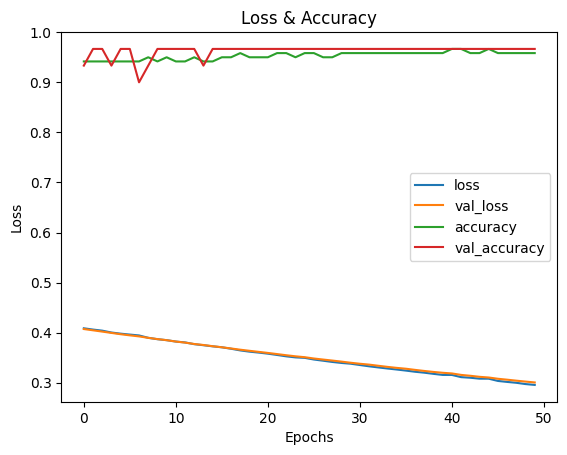

In [52]:
# matplotlib 이용하여 그래프 그리기
# 1. plot 그리기 : 입력  history.history['loss'] , history.history['val_loss']
# 2. plot 그리기 : 입력  history.history['accuracy'] , history.history['val_accuracy']
# 3. title : 'Loss and Accuracy'
# 4. xlabel : "Epochs"
# 5. ylabel : "Loss"
# 6. legend : ["Loss", "Accuracy"]
# 7. plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Loss & Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])





---